# Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Data Understanding

In [2]:
df= pd.read_csv(r"D:\TEL U\SEM 7 TELU\TA\TA\data\FIX_DATASETS.csv", sep= ';', low_memory=False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(1904, 693)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(7), int64(5), object(681)
memory usage: 10.1+ MB


In [5]:
df.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,1884.000000,1403.000000
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,0.420693,0.597164,26.238726,1.750535
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,0.493800,0.490597,15.160976,0.628999
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,17.000000,1.000000
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,0.000000,1.000000,23.000000,2.000000
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,1.000000,1.000000,30.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,1.000000,1.000000,182.000000,4.000000


In [6]:
print(df.nunique().to_string())

patient_id                        1904
age_at_diagnosis                  1572
type_of_breast_surgery               2
cancer_type                          2
cancer_type_detailed                 6
cellularity                          3
chemotherapy                         2
pam50_+_claudin-low_subtype          7
cohort                               5
er_status_measured_by_ihc            2
er_status                            2
neoplasm_histologic_grade            3
her2_status_measured_by_snp6         4
her2_status                          2
tumor_other_histologic_subtype       8
hormone_therapy                      2
inferred_menopausal_state            2
integrative_cluster                 11
primary_tumor_laterality             2
lymph_nodes_examined_positive       31
mutation_count                      30
nottingham_prognostic_index        310
oncotree_code                        6
overall_survival_months           1680
overall_survival                     2
pr_status                

In [7]:
print(df.isnull().sum().to_string())

patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therap

In [8]:
print(df.duplicated().sum())

0


# Data Prep

In [9]:
df = df.drop(['patient_id'], axis=1)

## Handling Data Types

### Categoricals

In [10]:
categoricals = df.select_dtypes(include='object')
categoricals

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,0,0,0,0,0,0,0,0,0,0
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0


In [11]:
categoricals.shape

(1904, 681)

In [12]:
#drop the numerical string on the categorical section
columns_to_drop = categoricals.loc[:, 'brca1':'ugt2b7']
categoricals = categoricals.drop(columns=columns_to_drop)
categoricals

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,0,0,0,0,0,0,0,0,0,0
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#object to category
categoricals = categoricals.astype({col: 'category' for col in categoricals.select_dtypes(include='object').columns})

In [14]:
print(categoricals.isnull().sum().to_string())

type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
pam50_+_claudin-low_subtype         0
er_status_measured_by_ihc          30
er_status                           0
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
pr_status                           0
3-gene_classifier_subtype         204
death_from_cancer                   1
pik3ca_mut                          0
tp53_mut                            0
muc16_mut                           0
ahnak2_mut                          0
kmt2c_mut                           0
syne1_mut                           0
gata3_mut                           0
map3k1_mut  

### Numericals

In [15]:
#inputing the columns of brca1 until ugt2b7 to a 'numericals' df and convert to float
numericals = df.loc[:, 'brca1':'ugt2b7'].columns
df[numericals] = df[numericals].apply(pd.to_numeric, errors='coerce')

In [16]:
print(df[numericals].dtypes.to_string())

brca1        float64
brca2        float64
palb2        float64
pten         float64
tp53         float64
atm          float64
cdh1         float64
chek2        float64
nbn          float64
nf1          float64
stk11        float64
bard1        float64
mlh1         float64
msh2         float64
msh6         float64
pms2         float64
epcam        float64
rad51c       float64
rad51d       float64
rad50        float64
rb1          float64
rbl1         float64
rbl2         float64
ccna1        float64
ccnb1        float64
cdk1         float64
ccne1        float64
cdk2         float64
cdc25a       float64
ccnd1        float64
cdk4         float64
cdk6         float64
ccnd2        float64
cdkn2a       float64
cdkn2b       float64
myc          float64
cdkn1a       float64
cdkn1b       float64
e2f1         float64
e2f2         float64
e2f3         float64
e2f4         float64
e2f5         float64
e2f6         float64
e2f7         float64
e2f8         float64
src          float64
jak1         

In [17]:
#converting to df
numericals = df.loc[:, 'brca1':'ugt2b7'] 

In [18]:
numericals

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-16.2170,14.5240,0.3504,11.5170,0.0348,0.1266,-0.8361,-0.8578,...,-11.8770,-0.0194,-16.3450,-0.2142,-0.5698,-11.7410,-14.7790,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-12.1540,0.5296,-0.0136,-0.2659,13.5940,0.7961,0.5419,-26.0590,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,11.3980,0.4187,-0.4030,-11.3050,...,-0.5381,0.0668,0.8344,17.2270,0.4024,-37.1720,-15.5380,13.7010,-0.1078,0.3655
3,0.6744,-0.5428,-16.5920,0.6369,16.7080,-0.8880,12.4910,-11.8890,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-23.2860,-0.9924,-0.3154,0.2320,-0.4828
4,12.9320,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,22.9610,0.1817,-0.1572,0.0427,50.0480,38.4760,13.2230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,13.8220,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,0.7859,15.3040,11.1960,0.8116,0.0958,-12.6440,-0.3566,-0.2615,-0.6371,-0.5540
1900,0.1343,0.9128,13.0170,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-10.7030,-0.6950,0.0641,-0.8863
1901,18.1070,-0.2608,0.4006,-0.2985,0.0356,-0.1620,15.4860,15.3090,-13.6530,-0.2529,...,-0.1457,-0.5194,23.9680,0.5917,-0.8643,-13.5410,-18.0760,-0.1840,0.0967,-0.6264
1902,-12.7460,-17.6950,-0.3454,-0.3850,0.6689,14.5310,10.9560,-0.0948,-0.6188,-19.4670,...,-0.6380,-15.2750,1.1070,0.2194,14.3170,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041


In [19]:
#int to float from the original df
df = df.astype({col: 'float64' for col in df.select_dtypes(include='int64').columns})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 692 entries, age_at_diagnosis to siah1_mut
dtypes: float64(500), object(192)
memory usage: 10.1+ MB


In [21]:
#converting the original numericals to df numericals2
numericals2= df[['tumor_stage', 'tumor_size', 'radio_therapy', 'overall_survival', 'mutation_count', 'lymph_nodes_examined_positive', 'hormone_therapy', 'neoplasm_histologic_grade', 'cohort', 'chemotherapy', 'age_at_diagnosis']]

In [22]:
print(type(numericals))
print(type(numericals2))
numericals2

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,tumor_stage,tumor_size,radio_therapy,overall_survival,mutation_count,lymph_nodes_examined_positive,hormone_therapy,neoplasm_histologic_grade,cohort,chemotherapy,age_at_diagnosis
0,2.0,22.0,1.0,1.0,NaN,10.0,1.0,3.0,1.0,0.0,75.65
1,1.0,10.0,1.0,1.0,2.0,0.0,1.0,3.0,1.0,0.0,43.19
2,2.0,15.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,48.87
3,2.0,25.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,47.68
4,2.0,40.0,1.0,0.0,2.0,8.0,1.0,3.0,1.0,1.0,76.97
...,...,...,...,...,...,...,...,...,...,...,...
1899,NaN,25.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,0.0,43.10
1900,NaN,20.0,1.0,0.0,6.0,1.0,0.0,3.0,4.0,0.0,42.88
1901,NaN,25.0,1.0,0.0,4.0,45.0,1.0,3.0,4.0,0.0,62.90
1902,NaN,25.0,0.0,0.0,15.0,12.0,1.0,2.0,4.0,0.0,61.16


In [23]:
#concating all numericals into one df= 'numericals'
numericals = pd.DataFrame(numericals)
numericals2 = pd.DataFrame(numericals2)
numericals = pd.concat([numericals, numericals2], axis=1)
numericals

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,tumor_size,radio_therapy,overall_survival,mutation_count,lymph_nodes_examined_positive,hormone_therapy,neoplasm_histologic_grade,cohort,chemotherapy,age_at_diagnosis
0,-1.3990,-0.5738,-16.2170,14.5240,0.3504,11.5170,0.0348,0.1266,-0.8361,-0.8578,...,22.0,1.0,1.0,NaN,10.0,1.0,3.0,1.0,0.0,75.65
1,-1.3800,0.2777,-12.1540,0.5296,-0.0136,-0.2659,13.5940,0.7961,0.5419,-26.0590,...,10.0,1.0,1.0,2.0,0.0,1.0,3.0,1.0,0.0,43.19
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,11.3980,0.4187,-0.4030,-11.3050,...,15.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,48.87
3,0.6744,-0.5428,-16.5920,0.6369,16.7080,-0.8880,12.4910,-11.8890,-0.4174,-0.6165,...,25.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,47.68
4,12.9320,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,40.0,1.0,0.0,2.0,8.0,1.0,3.0,1.0,1.0,76.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,13.8220,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,25.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,0.0,43.10
1900,0.1343,0.9128,13.0170,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,20.0,1.0,0.0,6.0,1.0,0.0,3.0,4.0,0.0,42.88
1901,18.1070,-0.2608,0.4006,-0.2985,0.0356,-0.1620,15.4860,15.3090,-13.6530,-0.2529,...,25.0,1.0,0.0,4.0,45.0,1.0,3.0,4.0,0.0,62.90
1902,-12.7460,-17.6950,-0.3454,-0.3850,0.6689,14.5310,10.9560,-0.0948,-0.6188,-19.4670,...,25.0,0.0,0.0,15.0,12.0,1.0,2.0,4.0,0.0,61.16


## Handling Null Values

### Categoricals

In [24]:
print(categoricals.isnull().sum().to_string())

type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
pam50_+_claudin-low_subtype         0
er_status_measured_by_ihc          30
er_status                           0
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
pr_status                           0
3-gene_classifier_subtype         204
death_from_cancer                   1
pik3ca_mut                          0
tp53_mut                            0
muc16_mut                           0
ahnak2_mut                          0
kmt2c_mut                           0
syne1_mut                           0
gata3_mut                           0
map3k1_mut  

In [25]:
#replace null values with MODE
categoricals = categoricals.fillna(categoricals.mode().iloc[0])
categoricals.isnull().sum()

type_of_breast_surgery         0
cancer_type                    0
cancer_type_detailed           0
cellularity                    0
pam50_+_claudin-low_subtype    0
                              ..
hras_mut                       0
prps2_mut                      0
smarcb1_mut                    0
stmn2_mut                      0
siah1_mut                      0
Length: 192, dtype: int64

In [26]:
#replace 0 to noMut
categoricals = categoricals.replace('0', 'noMut')
categoricals.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24056\278970225.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  categoricals = categoricals.replace('0', 'noMut')


,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut


In [27]:
print(categoricals.isnull().sum().to_string())

type_of_breast_surgery            0
cancer_type                       0
cancer_type_detailed              0
cellularity                       0
pam50_+_claudin-low_subtype       0
er_status_measured_by_ihc         0
er_status                         0
her2_status_measured_by_snp6      0
her2_status                       0
tumor_other_histologic_subtype    0
inferred_menopausal_state         0
integrative_cluster               0
primary_tumor_laterality          0
nottingham_prognostic_index       0
oncotree_code                     0
overall_survival_months           0
pr_status                         0
3-gene_classifier_subtype         0
death_from_cancer                 0
pik3ca_mut                        0
tp53_mut                          0
muc16_mut                         0
ahnak2_mut                        0
kmt2c_mut                         0
syne1_mut                         0
gata3_mut                         0
map3k1_mut                        0
ahnak_mut                   

### Numericals

In [28]:
print(numericals.isnull().sum().to_string())

brca1                              5
brca2                              7
palb2                             16
pten                               9
tp53                              17
atm                               12
cdh1                              12
chek2                             14
nbn                               13
nf1                                9
stk11                              7
bard1                             12
mlh1                              11
msh2                               8
msh6                              13
pms2                              12
epcam                             12
rad51c                            10
rad51d                            10
rad50                             12
rb1                               16
rbl1                              11
rbl2                              14
ccna1                              3
ccnb1                             13
cdk1                              18
ccne1                              8
c

In [29]:
#replace null values eith mean
numericals = numericals.fillna(numericals.mean())

In [30]:
numericals

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,tumor_size,radio_therapy,overall_survival,mutation_count,lymph_nodes_examined_positive,hormone_therapy,neoplasm_histologic_grade,cohort,chemotherapy,age_at_diagnosis
0,-1.3990,-0.5738,-16.2170,14.5240,0.3504,11.5170,0.0348,0.1266,-0.8361,-0.8578,...,22.0,1.0,1.0,5.697687,10.0,1.0,3.0,1.0,0.0,75.65
1,-1.3800,0.2777,-12.1540,0.5296,-0.0136,-0.2659,13.5940,0.7961,0.5419,-26.0590,...,10.0,1.0,1.0,2.000000,0.0,1.0,3.0,1.0,0.0,43.19
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,11.3980,0.4187,-0.4030,-11.3050,...,15.0,0.0,0.0,2.000000,1.0,1.0,2.0,1.0,1.0,48.87
3,0.6744,-0.5428,-16.5920,0.6369,16.7080,-0.8880,12.4910,-11.8890,-0.4174,-0.6165,...,25.0,1.0,1.0,1.000000,3.0,1.0,2.0,1.0,1.0,47.68
4,12.9320,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,40.0,1.0,0.0,2.000000,8.0,1.0,3.0,1.0,1.0,76.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,13.8220,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,25.0,1.0,1.0,4.000000,1.0,1.0,3.0,4.0,0.0,43.10
1900,0.1343,0.9128,13.0170,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,20.0,1.0,0.0,6.000000,1.0,0.0,3.0,4.0,0.0,42.88
1901,18.1070,-0.2608,0.4006,-0.2985,0.0356,-0.1620,15.4860,15.3090,-13.6530,-0.2529,...,25.0,1.0,0.0,4.000000,45.0,1.0,3.0,4.0,0.0,62.90
1902,-12.7460,-17.6950,-0.3454,-0.3850,0.6689,14.5310,10.9560,-0.0948,-0.6188,-19.4670,...,25.0,0.0,0.0,15.000000,12.0,1.0,2.0,4.0,0.0,61.16


In [31]:
numericals.isnull().sum()

brca1                        0
brca2                        0
palb2                        0
pten                         0
tp53                         0
                            ..
hormone_therapy              0
neoplasm_histologic_grade    0
cohort                       0
chemotherapy                 0
age_at_diagnosis             0
Length: 500, dtype: int64

### Concating

In [32]:
df1 = pd.concat([categoricals, numericals], axis=1)

In [33]:
df1

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,tumor_size,radio_therapy,overall_survival,mutation_count,lymph_nodes_examined_positive,hormone_therapy,neoplasm_histologic_grade,cohort,chemotherapy,age_at_diagnosis
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,22.0,1.0,1.0,5.697687,10.0,1.0,3.0,1.0,0.0,75.65
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,10.0,1.0,1.0,2.000000,0.0,1.0,3.0,1.0,0.0,43.19
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,15.0,0.0,0.0,2.000000,1.0,1.0,2.0,1.0,1.0,48.87
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,25.0,1.0,1.0,1.000000,3.0,1.0,2.0,1.0,1.0,47.68
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,40.0,1.0,0.0,2.000000,8.0,1.0,3.0,1.0,1.0,76.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,25.0,1.0,1.0,4.000000,1.0,1.0,3.0,4.0,0.0,43.10
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,20.0,1.0,0.0,6.000000,1.0,0.0,3.0,4.0,0.0,42.88
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,25.0,1.0,0.0,4.000000,45.0,1.0,3.0,4.0,0.0,62.90
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,25.0,0.0,0.0,15.000000,12.0,1.0,2.0,4.0,0.0,61.16


## Feature Correlations

### Numerical

In [34]:
#standarization
scaler = StandardScaler()
numerical_cols = df1.select_dtypes(include=['float64']).columns

scaler.fit(df1[numerical_cols])

StandardScaler()

In [35]:
le_status = LabelEncoder()
df1['cancer_type_detailed'] = le_status.fit_transform(df1['cancer_type_detailed'])

In [36]:
#Filter numerical columns
#numerical_cols = df1.select_dtypes(include=['float64']).columns

#Calculate correlation with the target (e.g., 'overall_survival')
corr_numerical = df1[numerical_cols].corrwith(df1['cancer_type_detailed'])

#Sort and get top 30 numerical correlations
best_numerical_corr30 = corr_numerical.abs().sort_values(ascending=False).head(20)
print(best_numerical_corr30)

neoplasm_histologic_grade    0.183020
aurka                        0.164329
chek1                        0.155601
ccne1                        0.155403
ahnak                        0.153383
e2f2                         0.151198
cdc25a                       0.148028
aph1b                        0.140536
cdh1                         0.139723
gsk3b                        0.139142
lama2                        0.136989
src                          0.136583
tgfb3                        0.129230
slc19a1                      0.129115
chemotherapy                 0.126801
lfng                         0.125689
mapt                         0.124449
cdk1                         0.123047
hsd17b10                     0.122454
bcl2                         0.121092
dtype: float64


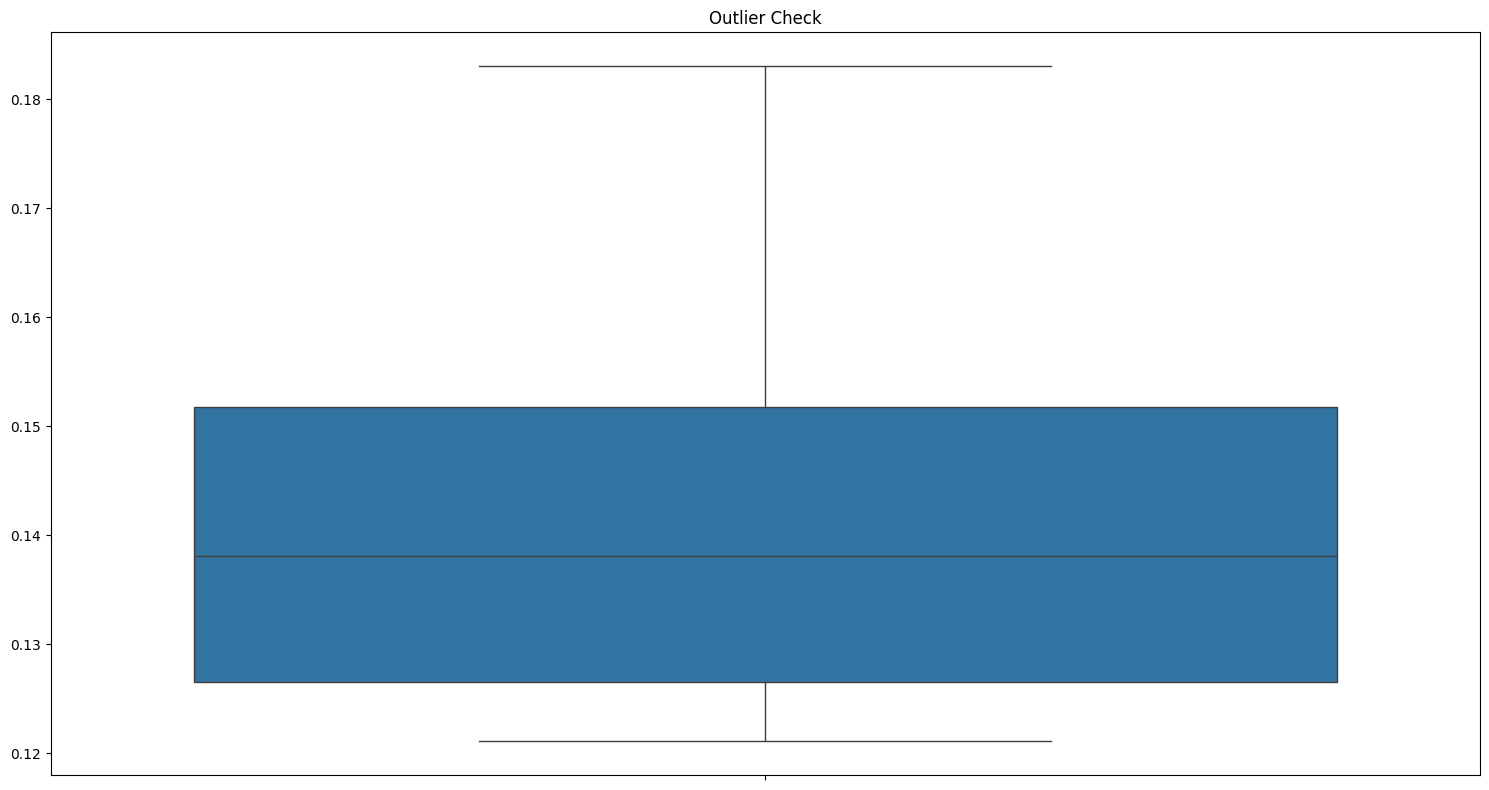

In [37]:
#outliers checking for top features only

# nc= numerical_cols

plt.figure(figsize=(15, 8))  # Mengatur ukuran agar lebih lebar

#Membuat boxplot untuk semua kolom numerik
sns.boxplot(data=best_numerical_corr30)

#Menambahkan judul
plt.title("Outlier Check")

#Mengatur rotasi label sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right')  # Rotasi 45 derajat dan menyelaraskan ke kanan

#Menampilkan plot
plt.tight_layout()  # Menyesuaikan layout agar tidak ada elemen yang tumpang tindih
plt.show()

### Categorical

In [38]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

#Filter categorical columns
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns

#Calculate Cramér's V for each categorical feature with the target
cramers_v_results = {}
for col in categorical_cols:
    cramers_v_results[col] = cramers_v(df1[col], df1['cancer_type_detailed'])

#Convert to Series for easy sorting
cramers_v_series = pd.Series(cramers_v_results)

#Sort and get top 30 categorical correlations
best_categorical_corr30 = cramers_v_series.abs().sort_values(ascending=False).head(20)
print(best_categorical_corr30)

tumor_other_histologic_subtype    1.000000
oncotree_code                     1.000000
overall_survival_months           0.960507
nottingham_prognostic_index       0.616842
ahnak2_mut                        0.584826
kmt2d_mut                         0.502620
stab2_mut                         0.483617
pde4dip_mut                       0.482536
map3k1_mut                        0.355901
muc16_mut                         0.332294
cdh1_mut                          0.319445
atr_mut                           0.317910
gata3_mut                         0.308866
pik3ca_mut                        0.302161
kmt2c_mut                         0.292360
tp53_mut                          0.290519
syne1_mut                         0.286450
ryr2_mut                          0.254836
thada_mut                         0.237467
dnah2_mut                         0.231456
dtype: float64


### Concat

In [39]:
#Combine both numerical and categorical correlations
combined_corr = pd.concat([best_numerical_corr30, best_categorical_corr30])

#Sort and get top 30 correlations overall
best_corr30 = combined_corr.sort_values(ascending=False).head(25)
print(best_corr30)

tumor_other_histologic_subtype    1.000000
oncotree_code                     1.000000
overall_survival_months           0.960507
nottingham_prognostic_index       0.616842
ahnak2_mut                        0.584826
kmt2d_mut                         0.502620
stab2_mut                         0.483617
pde4dip_mut                       0.482536
map3k1_mut                        0.355901
muc16_mut                         0.332294
cdh1_mut                          0.319445
atr_mut                           0.317910
gata3_mut                         0.308866
pik3ca_mut                        0.302161
kmt2c_mut                         0.292360
tp53_mut                          0.290519
syne1_mut                         0.286450
ryr2_mut                          0.254836
thada_mut                         0.237467
dnah2_mut                         0.231456
neoplasm_histologic_grade         0.183020
aurka                             0.164329
chek1                             0.155601
ccne1      

In [40]:
#Assuming 'best_corr30' is a Series with the column names as index
selected_columns = best_corr30.index.tolist()
#new df
df2 = df1[selected_columns]
df2['cancer_type_detailed'] = df.loc[:, 'cancer_type_detailed']
df2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24056\1521250552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cancer_type_detailed'] = df.loc[:, 'cancer_type_detailed']


,tumor_other_histologic_subtype,oncotree_code,overall_survival_months,nottingham_prognostic_index,ahnak2_mut,kmt2d_mut,stab2_mut,pde4dip_mut,map3k1_mut,muc16_mut,...,syne1_mut,ryr2_mut,thada_mut,dnah2_mut,neoplasm_histologic_grade,aurka,chek1,ccne1,ahnak,cancer_type_detailed
0,Ductal/NST,IDC,140.5,6.044,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,3.0,-15.7330,-16.3320,-13.3880,18.2270,Breast Invasive Ductal Carcinoma
1,Ductal/NST,IDC,8.463.333.333,4.02,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,3.0,-0.3052,-0.9604,-0.6273,16.6620,Breast Invasive Ductal Carcinoma
2,Ductal/NST,IDC,163.7,4.03,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,2.0,-0.2248,0.7585,-0.1245,-0.0154,Breast Invasive Ductal Carcinoma
3,Mixed,MDLC,16.493.333.330.000.000,4.05,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,2.0,20.4470,-0.8414,-0.6651,0.3101,Breast Mixed Ductal and Lobular Carcinoma
4,Mixed,MDLC,4.136.666.667,6.08,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,3.0,0.5882,0.4420,-10.5140,-0.7598,Breast Mixed Ductal and Lobular Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Lobular,ILC,1.968.666.667,5.05,noMut,noMut,noMut,noMut,R1482*,noMut,...,noMut,noMut,noMut,noMut,3.0,-10.1860,0.2688,-0.8540,0.5677,Breast Invasive Lobular Carcinoma
1900,Ductal/NST,IDC,4.473.333.333,5.04,noMut,P2931A,noMut,K1507_T1509del,noMut,noMut,...,noMut,S3592F P3579S,noMut,noMut,3.0,42.7850,10.1710,0.4602,-16.6260,Breast Invasive Ductal Carcinoma
1901,Ductal/NST,IDC,1.759.666.667,6.05,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,3.0,12.2950,0.7123,0.0583,-0.4341,Breast Invasive Ductal Carcinoma
1902,Ductal/NST,IDC,8.623.333.333,5.05,V3102M,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,2.0,-0.7075,-0.3057,-0.3042,0.6301,Breast Invasive Ductal Carcinoma


In [41]:
#Final Data
print(df2.to_string())

     tumor_other_histologic_subtype oncotree_code overall_survival_months nottingham_prognostic_index                                                 ahnak2_mut            kmt2d_mut                stab2_mut        pde4dip_mut                                      map3k1_mut                                         muc16_mut               cdh1_mut         atr_mut                gata3_mut                    pik3ca_mut                                  kmt2c_mut                                 tp53_mut                                         syne1_mut              ryr2_mut           thada_mut      dnah2_mut  neoplasm_histologic_grade      aurka      chek1      ccne1      ahnak                       cancer_type_detailed
0                        Ductal/NST           IDC                   140.5                       6.044                                                      noMut                noMut                    noMut              noMut                                           noMut    

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   tumor_other_histologic_subtype  1904 non-null   category
 1   oncotree_code                   1904 non-null   category
 2   overall_survival_months         1904 non-null   category
 3   nottingham_prognostic_index     1904 non-null   category
 4   ahnak2_mut                      1904 non-null   category
 5   kmt2d_mut                       1904 non-null   category
 6   stab2_mut                       1904 non-null   category
 7   pde4dip_mut                     1904 non-null   category
 8   map3k1_mut                      1904 non-null   category
 9   muc16_mut                       1904 non-null   category
 10  cdh1_mut                        1904 non-null   category
 11  atr_mut                         1904 non-null   category
 12  gata3_mut           

In [43]:
# Hapus titik sebagai pemisah ribuan dan konversikan ke float
df2['overall_survival_months'] = df2['overall_survival_months'].str.replace('.', '').astype(float)
df2['nottingham_prognostic_index'] = df2['nottingham_prognostic_index'].str.replace('.', '').astype(float)
df2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24056\2815016381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['overall_survival_months'] = df2['overall_survival_months'].str.replace('.', '').astype(float)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24056\2815016381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['nottingham_prognostic_index'] = df2['nottingham_prognostic_index'].str.replace('.', '').astype(float)


,tumor_other_histologic_subtype,oncotree_code,overall_survival_months,nottingham_prognostic_index,ahnak2_mut,kmt2d_mut,stab2_mut,pde4dip_mut,map3k1_mut,muc16_mut,...,syne1_mut,ryr2_mut,thada_mut,dnah2_mut,neoplasm_histologic_grade,aurka,chek1,ccne1,ahnak,cancer_type_detailed
0,Ductal/NST,IDC,1.405000e+03,6044.0,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,3.0,-15.7330,-16.3320,-13.3880,18.2270,Breast Invasive Ductal Carcinoma
1,Ductal/NST,IDC,8.463333e+09,402.0,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,3.0,-0.3052,-0.9604,-0.6273,16.6620,Breast Invasive Ductal Carcinoma
2,Ductal/NST,IDC,1.637000e+03,403.0,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,2.0,-0.2248,0.7585,-0.1245,-0.0154,Breast Invasive Ductal Carcinoma
3,Mixed,MDLC,1.649333e+16,405.0,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,2.0,20.4470,-0.8414,-0.6651,0.3101,Breast Mixed Ductal and Lobular Carcinoma
4,Mixed,MDLC,4.136667e+09,608.0,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,3.0,0.5882,0.4420,-10.5140,-0.7598,Breast Mixed Ductal and Lobular Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Lobular,ILC,1.968667e+09,505.0,noMut,noMut,noMut,noMut,R1482*,noMut,...,noMut,noMut,noMut,noMut,3.0,-10.1860,0.2688,-0.8540,0.5677,Breast Invasive Lobular Carcinoma
1900,Ductal/NST,IDC,4.473333e+09,504.0,noMut,P2931A,noMut,K1507_T1509del,noMut,noMut,...,noMut,S3592F P3579S,noMut,noMut,3.0,42.7850,10.1710,0.4602,-16.6260,Breast Invasive Ductal Carcinoma
1901,Ductal/NST,IDC,1.759667e+09,605.0,noMut,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,3.0,12.2950,0.7123,0.0583,-0.4341,Breast Invasive Ductal Carcinoma
1902,Ductal/NST,IDC,8.623333e+09,505.0,V3102M,noMut,noMut,noMut,noMut,noMut,...,noMut,noMut,noMut,noMut,2.0,-0.7075,-0.3057,-0.3042,0.6301,Breast Invasive Ductal Carcinoma


In [44]:
df2['cancer_type_detailed'] = df2['cancer_type_detailed'].astype('category') 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24056\3911783237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cancer_type_detailed'] = df2['cancer_type_detailed'].astype('category')


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   tumor_other_histologic_subtype  1904 non-null   category
 1   oncotree_code                   1904 non-null   category
 2   overall_survival_months         1904 non-null   float64 
 3   nottingham_prognostic_index     1904 non-null   float64 
 4   ahnak2_mut                      1904 non-null   category
 5   kmt2d_mut                       1904 non-null   category
 6   stab2_mut                       1904 non-null   category
 7   pde4dip_mut                     1904 non-null   category
 8   map3k1_mut                      1904 non-null   category
 9   muc16_mut                       1904 non-null   category
 10  cdh1_mut                        1904 non-null   category
 11  atr_mut                         1904 non-null   category
 12  gata3_mut           

# Data Model

In [46]:
#input and target
X= df2.drop(['cancer_type_detailed'], axis=1)
y= df2['cancer_type_detailed']

In [47]:
def one_hot_encode_all(X):
    # Automatically one-hot encode all categorical variables
    X = pd.get_dummies(X, drop_first=True)
    return X

X = one_hot_encode_all(X)

In [48]:
# List of columns to exclude from conversion
exclude_columns = ['overall_survival_months', 'nottingham_prognostic_index']

# Convert only boolean columns to 0 and 1, except the excluded columns
for col in X.columns:
    if col not in exclude_columns and X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

X

,overall_survival_months,nottingham_prognostic_index,neoplasm_histologic_grade,aurka,chek1,ccne1,ahnak,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Metaplastic,...,dnah2_mut_V928G,dnah2_mut_W1240C,dnah2_mut_W2917R,dnah2_mut_X2900_splice,dnah2_mut_X3412_splice,dnah2_mut_Y1960Lfs*14,dnah2_mut_Y3765H,dnah2_mut_Y4171C R2564H,dnah2_mut_Y4386*,dnah2_mut_Y807C
0,1.405000e+03,6044.0,3.0,-15.7330,-16.3320,-13.3880,18.2270,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.463333e+09,402.0,3.0,-0.3052,-0.9604,-0.6273,16.6620,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.637000e+03,403.0,2.0,-0.2248,0.7585,-0.1245,-0.0154,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.649333e+16,405.0,2.0,20.4470,-0.8414,-0.6651,0.3101,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.136667e+09,608.0,3.0,0.5882,0.4420,-10.5140,-0.7598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1.968667e+09,505.0,3.0,-10.1860,0.2688,-0.8540,0.5677,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,4.473333e+09,504.0,3.0,42.7850,10.1710,0.4602,-16.6260,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,1.759667e+09,605.0,3.0,12.2950,0.7123,0.0583,-0.4341,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,8.623333e+09,505.0,2.0,-0.7075,-0.3057,-0.3042,0.6301,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  
# y_categorical = to_categorical(y_encoded)

In [50]:
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Breast': 0, 'Breast Invasive Ductal Carcinoma': 1, 'Breast Invasive Lobular Carcinoma': 2, 'Breast Invasive Mixed Mucinous Carcinoma': 3, 'Breast Mixed Ductal and Lobular Carcinoma': 4, 'Metaplastic Breast Cancer': 5, nan: 6}


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [52]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# def build_ann(trial):
#     model = Sequential()
#     n_layers = trial.suggest_int("n_layers", 1, 3)
#     input_dim = X_train.shape[1]
    
#     for i in range(n_layers):
#         num_units = trial.suggest_int(f"n_units_l{i}", 32, 256)
#         model.add(Dense(num_units, activation='relu', input_dim=input_dim if i == 0 else None))
#         model.add(Dropout(trial.suggest_float(f"dropout_l{i}", 0.2, 0.5)))
        
#     model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

In [54]:
# def objective(trial):
#     classifier_name = trial.suggest_categorical("classifier", ["ANN", "DecisionTree", "RandomForest", "SVM", "XGBoost", "NaiveBayes"])
    
#     if classifier_name == "ANN":
#         y_train_cat = to_categorical(y_train)  # Categorical labels for ANN
#         y_test_cat = to_categorical(y_test)
#         model = build_ann(trial)
#         model.fit(X_train, y_train_cat, epochs=10, batch_size=32, verbose=0)
#         loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
#         return accuracy
    
#     elif classifier_name == "DecisionTree":
#         max_depth = trial.suggest_int("max_depth", 2, 32)
#         classifier_obj = DecisionTreeClassifier(max_depth=max_depth)
    
#     elif classifier_name == "RandomForest":
#         n_estimators = trial.suggest_int("n_estimators", 10, 100)
#         max_depth = trial.suggest_int("max_depth", 2, 32)
#         classifier_obj = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
#     elif classifier_name == "SVM":
#         C = trial.suggest_float("C", 1e-10, 1e10, log=True)
#         classifier_obj = SVC(C=C, probability=True)
    
#     elif classifier_name == "XGBoost":
#         classifier_obj = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    
#     elif classifier_name == "NaiveBayes":
#         classifier_obj = GaussianNB()

#     skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#     score = cross_val_score(classifier_obj, X_train, y_train, cv=skf, scoring="accuracy").mean()
#     return score


In [55]:
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["DecisionTree", "RandomForest", "SVM", "NaiveBayes", "XGBoost", "ANN"])
    
    if classifier_name == "DecisionTree":
        max_depth = trial.suggest_int("max_depth", 2, 32)
        classifier_obj = DecisionTreeClassifier(max_depth=max_depth)
        
    elif classifier_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 10, 100)
        max_depth = trial.suggest_int("max_depth", 2, 32)
        classifier_obj = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        
    elif classifier_name == "SVM":
        C = trial.suggest_float("C", 1e-10, 1e10, log=True)
        classifier_obj = SVC(C=C)
        
    elif classifier_name == "NaiveBayes":
        classifier_obj = GaussianNB()
        
    elif classifier_name == "XGBoost":
        classifier_obj = xgb.XGBClassifier()
        
    elif classifier_name == "ANN":
        model = Sequential()
        model.add(Dense(trial.suggest_int("units_l1", 32, 128), activation='relu', input_dim=X_train_scaled.shape[1]))
        model.add(Dropout(trial.suggest_float("dropout_l1", 0.2, 0.5)))
        model.add(Dense(trial.suggest_int("units_l2", 32, 128), activation='relu'))
        model.add(Dropout(trial.suggest_float("dropout_l2", 0.2, 0.5)))
        model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # For multi-class classification
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        classifier_obj = model
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    if classifier_name == "ANN":
        history = classifier_obj.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.1)
        score = np.mean(history.history['val_accuracy'])
    else:
        score = cross_val_score(classifier_obj, X_train, y_train, cv=skf, scoring="accuracy").mean()
    
    return score

In [58]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

[I 2024-10-11 07:14:46,729] A new study created in memory with name: no-name-69d21b9d-5602-47f8-8670-6d6391890ce3
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-10-11 07:14:49,635] Trial 0 finished with value: 0.8091503381729126 and parameters: {'classifier': 'ANN', 'units_l1': 65, 'dropout_l1': 0.39775700111487444, 'units_l2': 34, 'dropout_l2': 0.3643438263035822}. Best is trial 0 with value: 0.8091503381729126.
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
[I 2024-10-11 07:14:52,899] Tria

In [59]:
# print("Best model:", study.best_trial.params)
print("Best model:", study.best_trial.params)
best_params = study.best_trial.params

Best model: {'classifier': 'DecisionTree', 'max_depth': 6}


In [ ]:
# best_params = study.best_trial.params
# if best_params['classifier'] == 'ANN':
#     y_train_cat = to_categorical(y_train)  # Categorical labels for ANN
#     y_test_cat = to_categorical(y_test)
#     modela = build_ann(study.best_trial)
#     modela.fit(X_train, y_train_cat, epochs=50, batch_size=32, verbose=1)
#     y_pred = modela.predict(X_test)
#     y_pred_labels = np.argmax(y_pred, axis=1)
# else:
#     if best_params['classifier'] == 'DecisionTree':
#         modela = DecisionTreeClassifier(max_depth=best_params['max_depth'])
#     elif best_params['classifier'] == 'RandomForest':
#         modela = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
#     elif best_params['classifier'] == 'SVM':
#         modela = SVC(C=best_params['C'], probability=True)
#     elif best_params['classifier'] == 'XGBoost':
#         modela = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
#     elif best_params['classifier'] == 'NaiveBayes':
#         modela = GaussianNB()
    
#     modela.fit(X_train, y_train)  # Use one-dimensional y_train (non-categorical)
#     y_pred_labels = modela.predict(X_test)

In [60]:
if best_params['classifier'] == 'ANN':
    modela = Sequential()
    modela.add(Dense(best_params["units_l1"], activation='relu', input_dim=X_train_scaled.shape[1]))
    modela.add(Dropout(best_params["dropout_l1"]))
    modela.add(Dense(best_params["units_l2"], activation='relu'))
    modela.add(Dropout(best_params["dropout_l2"]))
    modela.add(Dense(len(np.unique(y_train)), activation='softmax'))
    modela.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = modela.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.1)
else:
    if best_params['classifier'] == 'DecisionTree':
        modela = DecisionTreeClassifier(max_depth=best_params['max_depth'])
    elif best_params['classifier'] == 'RandomForest':
        modela = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
    elif best_params['classifier'] == 'SVM':
        modela = SVC(C=best_params['C'])
    elif best_params['classifier'] == 'NaiveBayes':
        modela = GaussianNB()
    elif best_params['classifier'] == 'XGBoost':
        modela = xgb.XGBClassifier()
    
    modela.fit(X_train, y_train)


In [62]:
# # y_test_labels = np.argmax(y_test, axis=1)
# # print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))
# print(classification_report(y_test, y_pred_labels, target_names=le.classes_))

if best_params['classifier'] == 'ANN':
    y_pred = modela.predict(X_test_scaled)  # ANN outputs probabilities
    y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to predicted class
else:
    y_pred_labels = modela.predict(X_test)  # Direct predictions for non-ANN models

# print(classification_report(y_test, y_pred_labels, target_names=le.classes_))


In [70]:
unique_labels = np.unique(y_test)
# class_names = le.classes_[unique_labels]
class_names = [str(cls) for cls in le.classes_[unique_labels]]

In [71]:
print(classification_report(y_test, y_pred_labels, target_names=class_names))

                                           precision    recall  f1-score   support

                                   Breast       1.00      1.00      1.00         4
         Breast Invasive Ductal Carcinoma       0.99      1.00      1.00       302
        Breast Invasive Lobular Carcinoma       1.00      1.00      1.00        35
 Breast Invasive Mixed Mucinous Carcinoma       1.00      1.00      1.00         4
Breast Mixed Ductal and Lobular Carcinoma       1.00      1.00      1.00        33
                                      nan       0.00      0.00      0.00         3

                                 accuracy                           0.99       381
                                macro avg       0.83      0.83      0.83       381
                             weighted avg       0.98      0.99      0.99       381



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

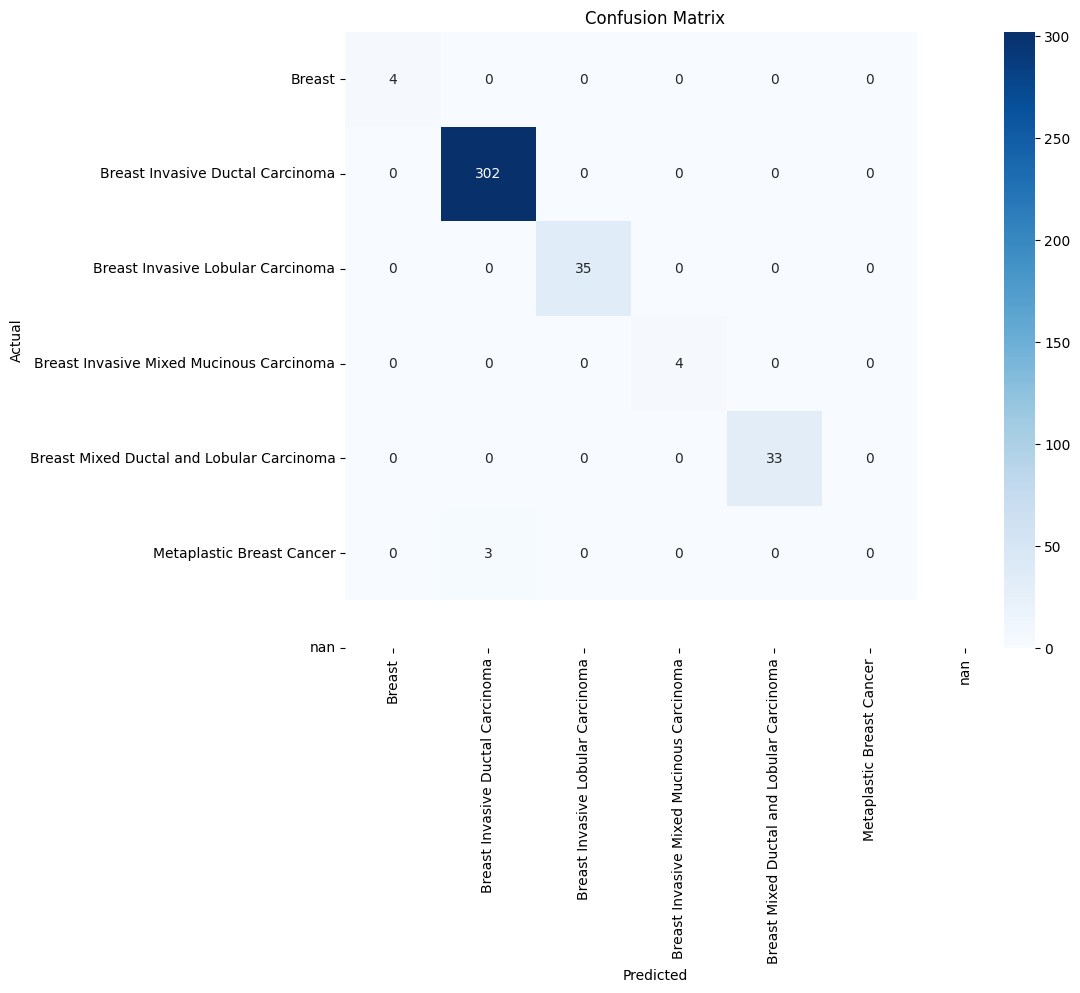

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy: 99.54%
Testing Accuracy: 99.21%


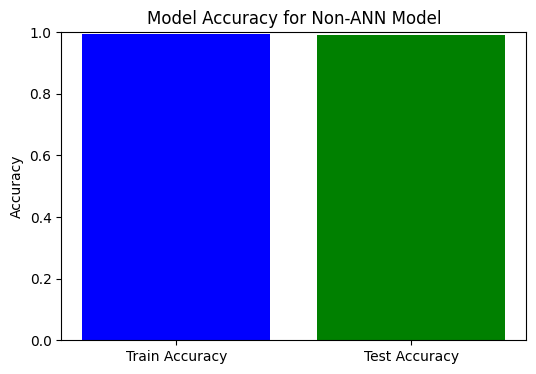

                                           precision    recall  f1-score   support

                                   Breast       1.00      1.00      1.00         4
         Breast Invasive Ductal Carcinoma       0.99      1.00      1.00       302
        Breast Invasive Lobular Carcinoma       1.00      1.00      1.00        35
 Breast Invasive Mixed Mucinous Carcinoma       1.00      1.00      1.00         4
Breast Mixed Ductal and Lobular Carcinoma       1.00      1.00      1.00        33
                                      nan       0.00      0.00      0.00         3

                                 accuracy                           0.99       381
                                macro avg       0.83      0.83      0.83       381
                             weighted avg       0.98      0.99      0.99       381



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

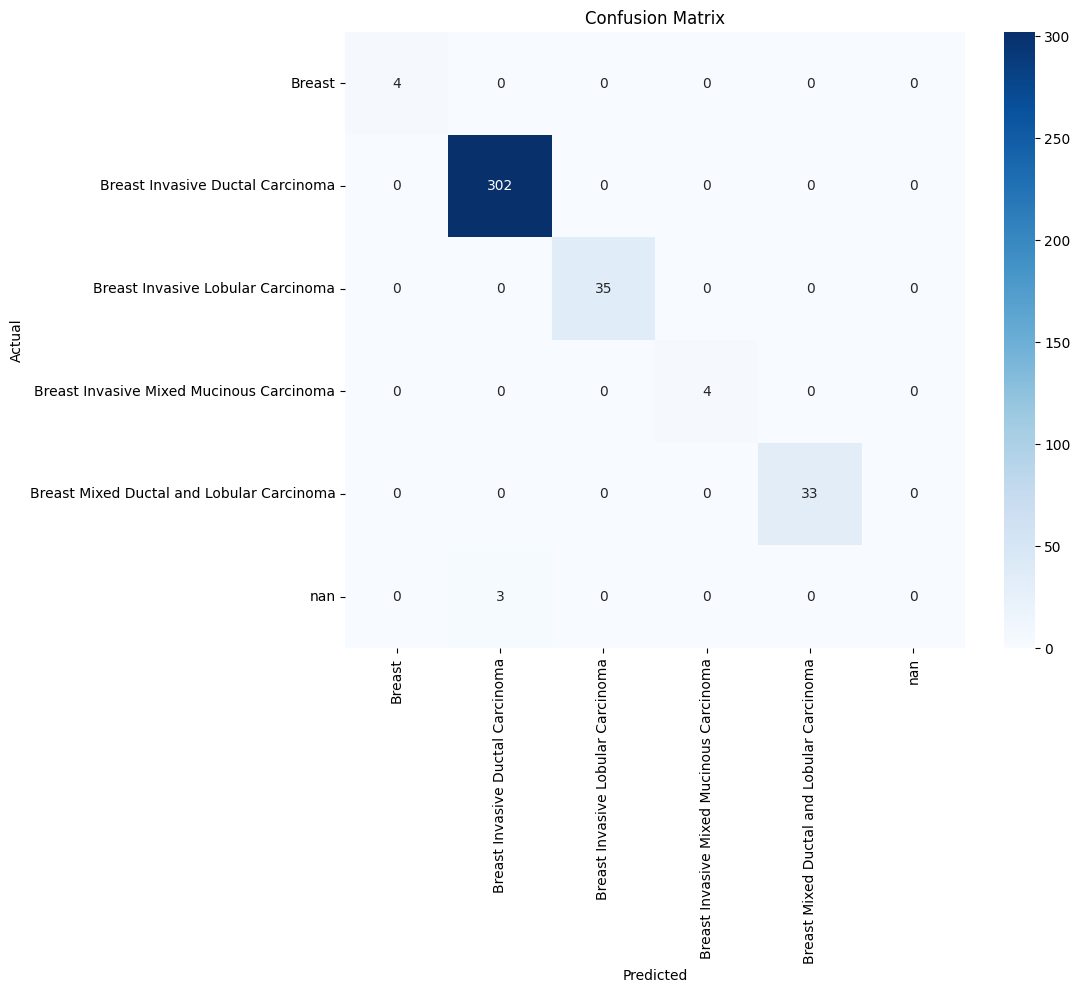

In [75]:
if best_params['classifier'] == 'ANN':
    # Plot accuracy and loss for ANN model
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout() 
    plt.show()          

else:
    # For non-ANN models, calculate accuracy and visualize it
    train_accuracy = accuracy_score(y_train, modela.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred_labels)

    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
    print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

    # Plot training and testing accuracy for non-ANN models
    plt.figure(figsize=(6, 4))
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
    plt.title('Model Accuracy for Non-ANN Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

    # Confusion Matrix and Classification Report
    unique_labels = np.unique(y_test)
    class_names = [str(cls) for cls in le.classes_[unique_labels]]
    
    print(classification_report(y_test, y_pred_labels, target_names=class_names))
    
    conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=unique_labels)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()
